In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

In [2]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import os

In [3]:
data = pd.read_csv("twitter_data.csv")

In [4]:
data.head()

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [5]:
data.shape

(43943, 3)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43943 entries, 0 to 43942
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  43943 non-null  int64 
 1   message    43943 non-null  object
 2   tweetid    43943 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


In [7]:
data.describe()

,sentiment,tweetid
count,43943.000000,4.394300e+04
mean,0.853924,8.367966e+17
std,0.853543,8.568506e+16
min,-1.000000,5.926334e+17
25%,0.000000,7.970376e+17
50%,1.000000,8.402301e+17
75%,1.000000,9.020003e+17
max,2.000000,9.667024e+17


In [8]:
data.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [9]:
data.drop(['tweetid'],inplace=True, axis=1)
data.isnull().sum()

sentiment    0
message      0
dtype: int64

In [10]:
data.duplicated().sum()

2902

In [11]:
data.drop_duplicates(inplace=True, keep=False)
data.duplicated().sum()

0

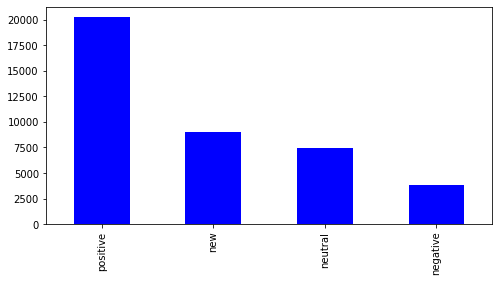

In [12]:
data['sentiment']=data['sentiment'].map({-1:'negative',0:'neutral',1:'positive',2:'new'})
data['sentiment'].value_counts().nlargest(5).plot(kind='bar', figsize=(8,4), color='blue')

In [13]:
data['sentiment']=data['sentiment'].map({'negative':-1,'neutral':0,'positive':1,'new':2})

In [14]:
data = data[data.sentiment != 2]

data['sentiment'].value_counts()

 1    20272
 0     7426
-1     3833
Name: sentiment, dtype: int64

In [15]:
data['message']

0        @tiniebeany climate change is an interesting h...
2        Fabulous! Leonardo #DiCaprio's film on #climat...
3        RT @Mick_Fanning: Just watched this amazing do...
5        Unamshow awache kujinga na iko global warming ...
8        RT @AmericanIndian8: Leonardo DiCaprio's clima...
                               ...                        
43936    #AikBaatSuniThi \nGlobal warming has negative ...
43938    Dear @realDonaldTrump,\nYeah right. Human Medi...
43939    What will your respective parties do to preven...
43941    RT @taehbeingextra: i still can$q$t believe th...
43942    @Likeabat77 @zachhaller \n\nThe wealthy + foss...
Name: message, Length: 31531, dtype: object

In [16]:
def clean(text):
    text = re.sub(r'@\w+', '', text)
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub('[0-9]+', '', text)
    text = text.encode('ascii', 'ignore')
    text = text.decode('utf-8', 'ignore')
    text = text.lower()
    return text

data['messageclear'] = data['message'].apply(lambda x: clean(x))
data.head()

,sentiment,message,messageclear
0,-1,@tiniebeany climate change is an interesting h...,climate change is an interesting hustle as it...
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,fabulous leonardo dicaprios film on climate ch...
3,1,RT @Mick_Fanning: Just watched this amazing do...,just watched this amazing documentary by leona...
5,0,Unamshow awache kujinga na iko global warming ...,unamshow awache kujinga na iko global warming
8,0,RT @AmericanIndian8: Leonardo DiCaprio's clima...,leonardo dicaprios climate change documentary ...


In [17]:
data['messageclear']

0         climate change is an interesting hustle as it...
2        fabulous leonardo dicaprios film on climate ch...
3        just watched this amazing documentary by leona...
5           unamshow awache kujinga na iko global warming 
8        leonardo dicaprios climate change documentary ...
                               ...                        
43936    aikbaatsunithi global warming has negative eff...
43938    dear yeah right human mediated climate change ...
43939    what will your respective parties do to preven...
43941    i still canqt believe this gif of taehyung sav...
43942      the wealthy  fossil fuel industry know clima...
Name: messageclear, Length: 31531, dtype: object

(-0.5, 999.5, 499.5, -0.5)

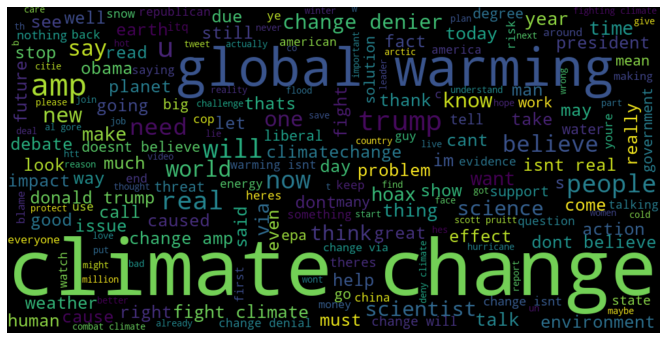

In [18]:
words = ' '.join([word for word in data['messageclear']])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

In [19]:
tokenizer = RegexpTokenizer(r'\w+')

data['tokenized']=data['messageclear'].apply(lambda x: tokenizer.tokenize(x))

In [20]:
stopword = nltk.corpus.stopwords.words('english')

In [21]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
data['notstopwords'] = data['tokenized'].apply(lambda x: remove_stopwords(x))

In [22]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

data['stemmer'] = data['notstopwords'].apply(lambda x: stemming(x))

In [23]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

data['lemmatizer'] = data['notstopwords'].apply(lambda x: lemmatizer(x))

In [24]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)
    
data['tweets'] = data['notstopwords'].apply(lambda x: detokenize(x))

data['tweets'] = data['tweets'].str.replace(r'\b(\w{1,2})\b', '')

In [25]:
data['wordcounts'] = data['messageclear'].apply(lambda x : len(str(x).split()))

data['tweetscounts'] = data['tweets'].apply(lambda x : len(str(x).split()))

In [26]:
data.head()

,sentiment,message,messageclear,tokenized,notstopwords,stemmer,lemmatizer,tweets,wordcounts,tweetscounts
0,-1,@tiniebeany climate change is an interesting h...,climate change is an interesting hustle as it...,"[climate, change, is, an, interesting, hustle,...","[climate, change, interesting, hustle, global,...","[climat, chang, interest, hustl, global, warm,...","[climate, change, interesting, hustle, global,...",climate change interesting hustle global warmi...,22,12
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,fabulous leonardo dicaprios film on climate ch...,"[fabulous, leonardo, dicaprios, film, on, clim...","[fabulous, leonardo, dicaprios, film, climate,...","[fabul, leonardo, dicaprio, film, climat, chan...","[fabulous, leonardo, dicaprios, film, climate,...",fabulous leonardo dicaprios film climate chang...,12,9
3,1,RT @Mick_Fanning: Just watched this amazing do...,just watched this amazing documentary by leona...,"[just, watched, this, amazing, documentary, by...","[watched, amazing, documentary, leonardodicapr...","[watch, amaz, documentari, leonardodicaprio, c...","[watched, amazing, documentary, leonardodicapr...",watched amazing documentary leonardodicaprio c...,14,7
5,0,Unamshow awache kujinga na iko global warming ...,unamshow awache kujinga na iko global warming,"[unamshow, awache, kujinga, na, iko, global, w...","[unamshow, awache, kujinga, na, iko, global, w...","[unamshow, awach, kujinga, na, iko, global, warm]","[unamshow, awache, kujinga, na, iko, global, w...",unamshow awache kujinga iko global warming,7,6
8,0,RT @AmericanIndian8: Leonardo DiCaprio's clima...,leonardo dicaprios climate change documentary ...,"[leonardo, dicaprios, climate, change, documen...","[leonardo, dicaprios, climate, change, documen...","[leonardo, dicaprio, climat, chang, documentar...","[leonardo, dicaprios, climate, change, documen...",leonardo dicaprios climate change documentary ...,12,9


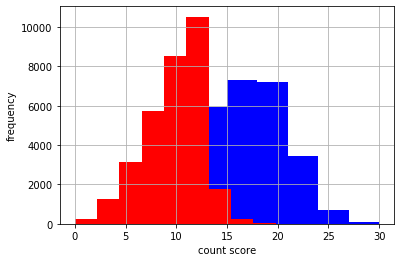

In [27]:
data['wordcounts'].hist(color='blue')
data['tweetscounts'].hist(color='red')
plt.xlabel('count score')
plt.ylabel('frequency')
plt.show()

(-0.5, 999.5, 499.5, -0.5)

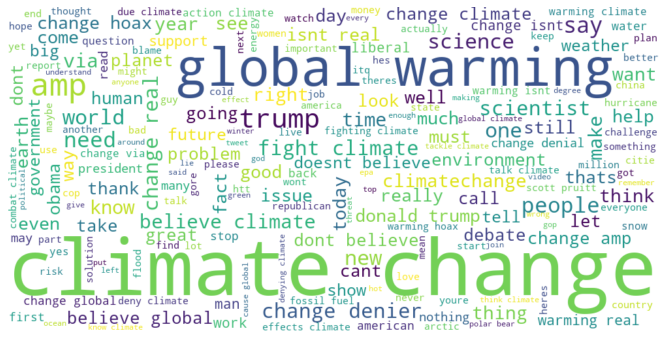

In [28]:
words = ' '.join([word for word in data['tweets']])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120, background_color="white").generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from yellowbrick.classifier import ClassPredictionError

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB

mnb = MultinomialNB()
cnb = ComplementNB()
bnb = BernoulliNB()

In [30]:
tfidf = TfidfVectorizer()
text_count = tfidf.fit_transform(data['tweets'])

x_train, x_test, y_train, y_test = train_test_split(text_count, data['sentiment'],test_size=0.20,random_state=42)

In [31]:
mnb.fit(x_train,y_train)

print(mnb.score(x_train,y_train))
print(mnb.score(x_test,y_test))

0.6975895972090073
0.6751228793404154


In [32]:
y_pred = mnb.predict(x_test)

In [33]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,-1,0,1,All
True,,,,
-1,38,15,727,780
0,1,132,1296,1429
1,0,10,4088,4098
All,39,157,6111,6307


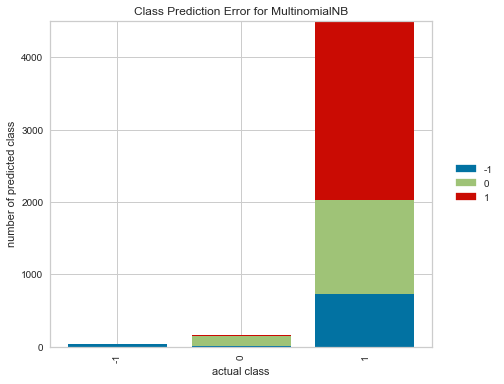

In [34]:
visualizer = ClassPredictionError(MultinomialNB())

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [35]:
cnb.fit(x_train,y_train)

print(cnb.score(x_train,y_train))
print(cnb.score(x_test,y_test))

0.8533539486203615
0.7188837799270652


In [36]:
y_pred = cnb.predict(x_test)

In [37]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,-1,0,1,All
True,,,,
-1,368,87,325,780
0,180,500,749,1429
1,187,245,3666,4098
All,735,832,4740,6307


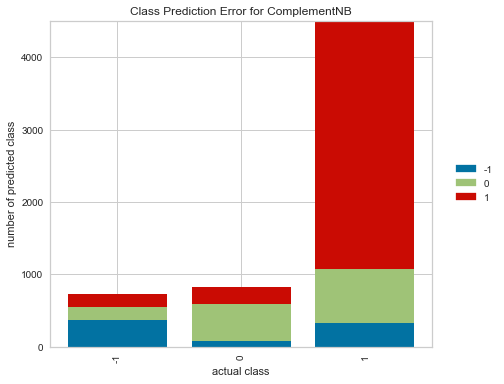

In [38]:
visualizer = ClassPredictionError(ComplementNB())

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [39]:
bnb.fit(x_train,y_train)

print(bnb.score(x_train,y_train))
print(bnb.score(x_test,y_test))

0.7801300348874088
0.7068336768669732


In [40]:
y_pred = bnb.predict(x_test)

In [41]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,-1,0,1,All
True,,,,
-1,121,183,476,780
0,10,542,877,1429
1,9,294,3795,4098
All,140,1019,5148,6307


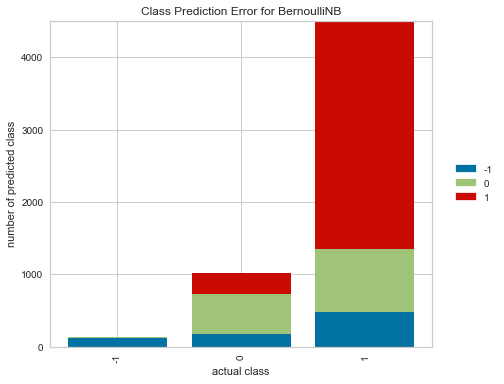

In [42]:
visualizer = ClassPredictionError(BernoulliNB())

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [44]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(data['tweets'][-10000:].values.astype('U'))

x=text_counts
y=data['sentiment'][-10000:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [45]:
knn = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
knn.fit(x_train, y_train)

print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

0.575
0.3485


In [46]:
y_pred = knn.predict(x_test)

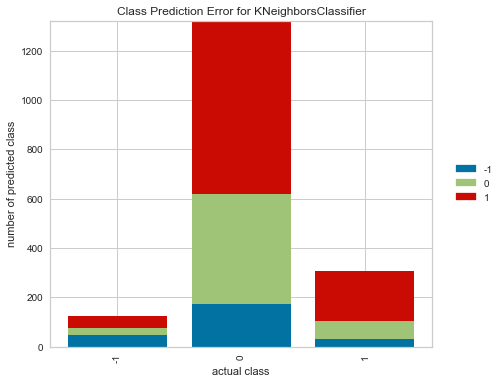

In [47]:
visualizer = ClassPredictionError(KNeighborsClassifier(n_neighbors=2, n_jobs=-1))

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [48]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,-1,0,1,All
True,,,,
-1,47,174,32,253
0,31,444,71,546
1,46,949,206,1201
All,124,1567,309,2000


In [49]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6905
Mean Squared Error: 0.7685
Root Mean Squared Error: 0.8766413177577247


In [50]:
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(x_train, y_train)
    
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test) 

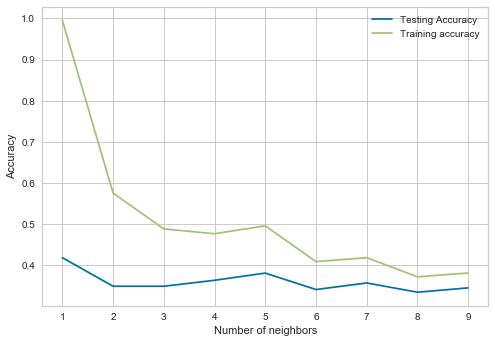

In [51]:
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [52]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(x_train, y_train)

print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.95875
0.699


In [53]:
y_pred = lr.predict(x_test)

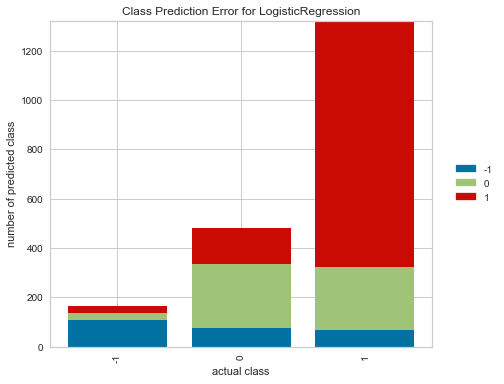

In [54]:
visualizer = ClassPredictionError(LogisticRegression(solver='lbfgs', max_iter=1000))

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [55]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,-1,0,1,All
True,,,,
-1,108,75,70,253
0,30,262,254,546
1,28,145,1028,1201
All,166,482,1352,2000


In [56]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.35
Mean Squared Error: 0.448
Root Mean Squared Error: 0.6693280212272604


In [57]:
C = np.arange(1,10)
train_accuracy =np.empty(len(C))
test_accuracy = np.empty(len(C))

for i,k in enumerate(C):
    lr = LogisticRegression(solver='lbfgs', max_iter=1000, C = k)
    
    lr.fit(x_train, y_train)
    
    train_accuracy[i] = lr.score(x_train, y_train)
    test_accuracy[i] = lr.score(x_test, y_test) 

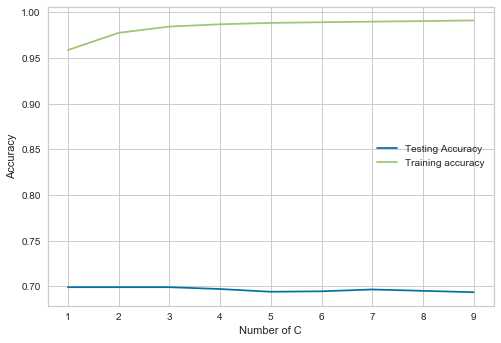

In [58]:
plt.plot(C, test_accuracy, label='Testing Accuracy')
plt.plot(C, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of C')
plt.ylabel('Accuracy')
plt.show()

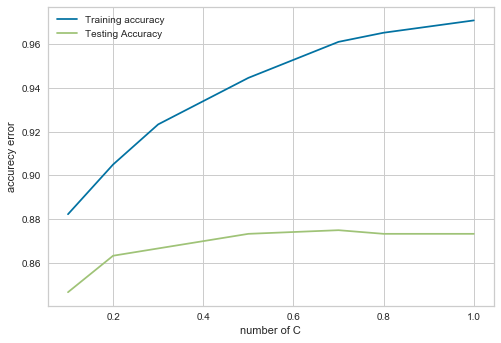

In [89]:
n = [0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 1.0]
trainL = []
testL = []
for i in n:
    lr = LogisticRegression(solver='lbfgs', max_iter=1000, C = i)
    lr.fit(x_train, y_train)
    
    train_accuracy = lr.score(x_train, y_train)
    trainL.append(train_accuracy)
    test_accuracy = lr.score(x_test, y_test) 
    testL.append(test_accuracy)

plt.plot(n, trainL, label='Training accuracy')
plt.plot(n, testL, label='Testing Accuracy')
plt.legend()
plt.ylabel("accurecy error")
plt.xlabel("number of C")
plt.show()

In [62]:
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

print(svc.score(x_train,y_train))
print(svc.score(x_test,y_test))

0.97575
0.6915


In [63]:
y_pred = svc.predict(x_test)

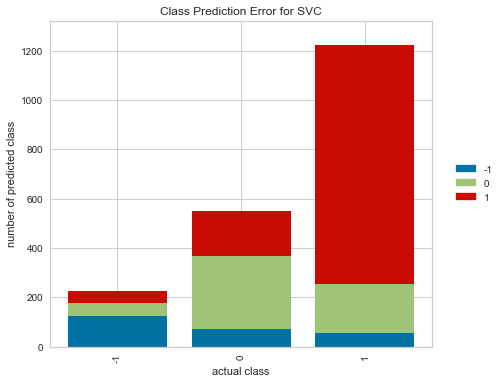

In [64]:
visualizer = ClassPredictionError(SVC(kernel='linear'))

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [65]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,-1,0,1,All
True,,,,
-1,124,73,56,253
0,54,293,199,546
1,49,186,966,1201
All,227,552,1221,2000


In [66]:
C = np.arange(1,10)
train_accuracy =np.empty(len(C))
test_accuracy = np.empty(len(C))

for i,k in enumerate(C):
    svc = SVC(kernel='linear', C = k)
    
    svc.fit(x_train, y_train)
    
    train_accuracy[i] = svc.score(x_train, y_train)
    test_accuracy[i] = svc.score(x_test, y_test) 

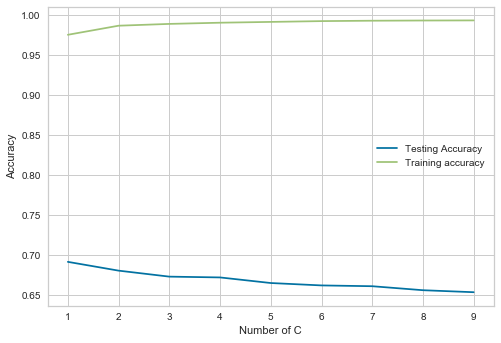

In [67]:
plt.plot(C, test_accuracy, label='Testing Accuracy')
plt.plot(C, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of C')
plt.ylabel('Accuracy')
plt.show()

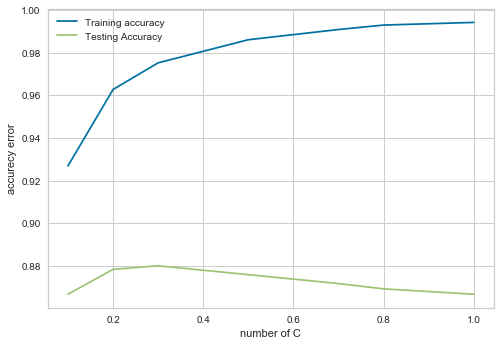

In [90]:
n = [0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 1.0]
trainS = []
testS = []
for i in n:
    svc = SVC(kernel='linear', C = i)
    svc.fit(x_train, y_train)
    
    train_accuracy = svc.score(x_train, y_train)
    trainS.append(train_accuracy)
    test_accuracy = svc.score(x_test, y_test) 
    testS.append(test_accuracy)

plt.plot(n, trainS, label='Training accuracy')
plt.plot(n, testS, label='Testing Accuracy')
plt.legend()
plt.ylabel("accurecy error")
plt.xlabel("number of C")
plt.show()

In [69]:
data = data[data.sentiment != 0]

data['sentiment'].value_counts()

 1    20272
-1     3833
Name: sentiment, dtype: int64

In [70]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(data['tweets'][-6000:].values.astype('U'))

x=text_counts
y=data['sentiment'][-6000:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [71]:
knn = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
knn.fit(x_train, y_train)

print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

0.8789583333333333
0.7425


In [72]:
y_pred = knn.predict(x_test)

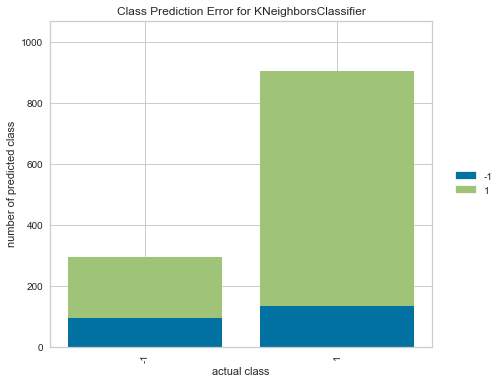

In [73]:
visualizer = ClassPredictionError(KNeighborsClassifier(n_neighbors=2, n_jobs=-1))

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [74]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,-1,1,All
True,,,
-1,94,134,228
1,175,797,972
All,269,931,1200


In [75]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.515
Mean Squared Error: 1.03
Root Mean Squared Error: 1.014889156509222


In [76]:
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(x_train, y_train)
    
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test) 

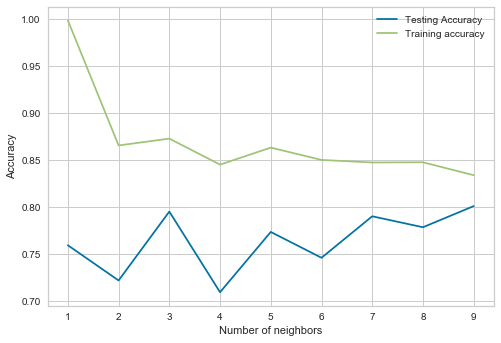

In [77]:
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

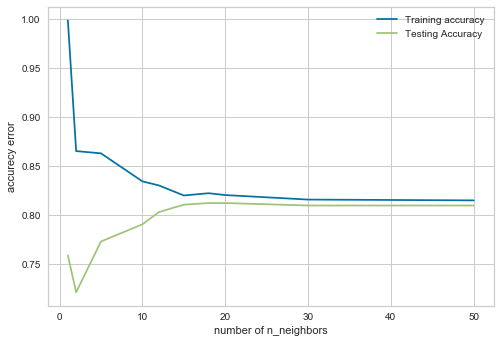

In [78]:
n = [1, 2, 5, 8, 10, 12, 15, 18, 20, 30, 50]
trainK = []
testK = []
for i in n:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    
    train_accuracy = knn.score(x_train, y_train)
    trainK.append(train_accuracy)
    test_accuracy = knn.score(x_test, y_test) 
    testK.append(test_accuracy)

plt.plot(n, trainK, label='Training accuracy')
plt.plot(n, testK, label='Testing Accuracy')
plt.legend()
plt.ylabel("accurecy error")
plt.xlabel("number of n_neighbors")
plt.show()

In [79]:
import unicodedata

In [80]:
def basic_clean(text):
    wn = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') 
    text = (unicodedata.normalize('NFKD', text)
        .encode('ascii', 'ignore')
        .decode('utf-8', 'ignore')
        .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wn.lemmatize(word) for word in words if word not in stopwords]

words = basic_clean(''.join(str(data['tweets'].tolist())))

Text(0.5, 0, 'number of occurances')

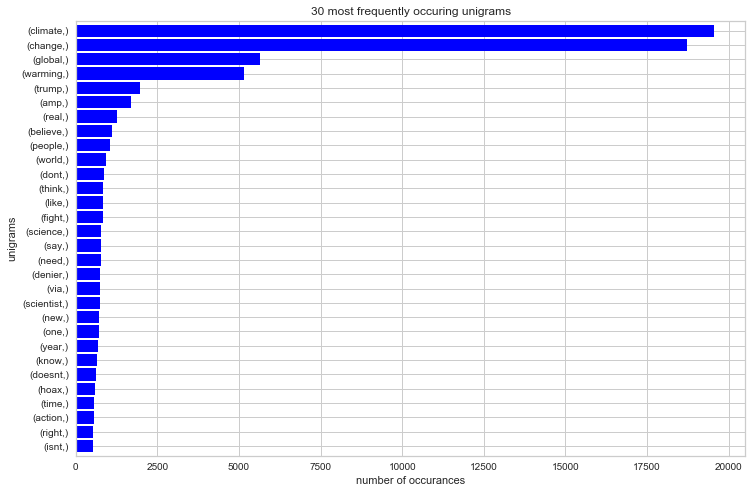

In [81]:
unigrams_series =(pd.Series(nltk.ngrams(words, 1)).value_counts())[:30]
unigrams_series.sort_values().plot.barh(color='blue', width=.85, figsize=(12, 8))
plt.title('30 most frequently occuring unigrams')
plt.ylabel('unigrams')
plt.xlabel('number of occurances')

In [82]:
print(unigrams_series)

(climate,)      19536
(change,)       18737
(global,)        5652
(warming,)       5158
(trump,)         1964
(amp,)           1692
(real,)          1276
(believe,)       1110
(people,)        1038
(world,)          918
(dont,)           867
(think,)          843
(like,)           832
(fight,)          828
(science,)        770
(say,)            766
(need,)           762
(denier,)         743
(via,)            737
(scientist,)      733
(new,)            701
(one,)            697
(year,)           689
(know,)           659
(doesnt,)         629
(hoax,)           585
(time,)           562
(action,)         548
(right,)          534
(isnt,)           519
dtype: int64


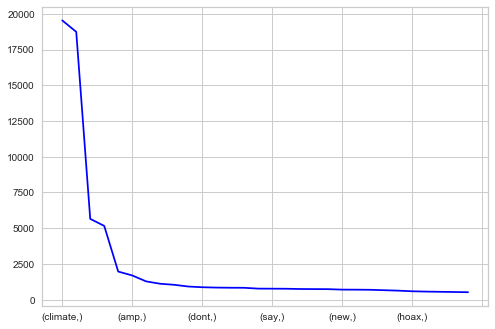

In [83]:
unigrams_series.plot(color='blue')
plt.show()

Text(0.5, 0, 'number of occurances')

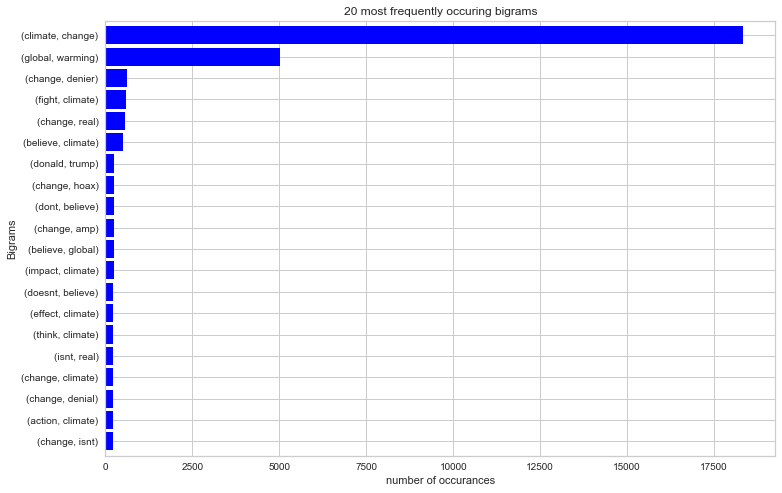

In [84]:
bigrams_series =(pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]
bigrams_series.sort_values().plot.barh(color='blue', width=.85, figsize=(12, 8))
plt.title('20 most frequently occuring bigrams')
plt.ylabel('Bigrams')
plt.xlabel('number of occurances')

Text(0.5, 0, 'number of occurances')

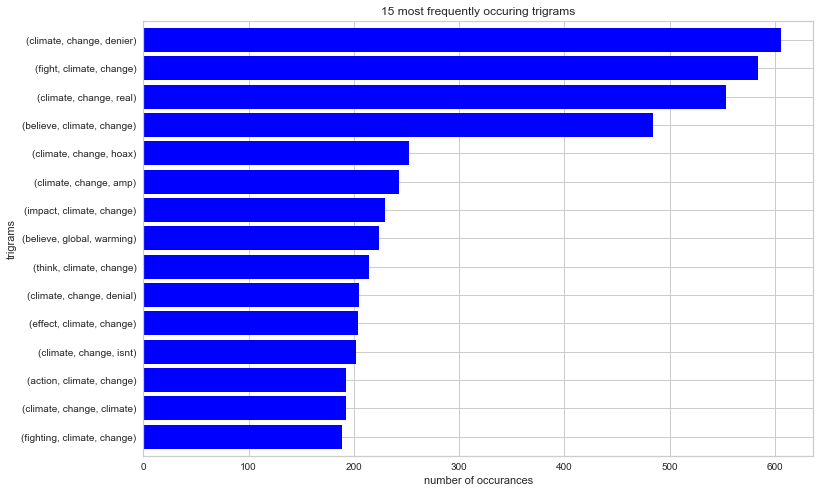

In [85]:
trigrams_series =(pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]
trigrams_series.sort_values().plot.barh(color='blue', width=.85, figsize=(12, 8))
plt.title('15 most frequently occuring trigrams')
plt.ylabel('trigrams')
plt.xlabel('number of occurances')

In [86]:
countVectorizer = CountVectorizer()
countVector = countVectorizer.fit_transform(data['tweets'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))

24105 Number of tweets has 23981 words
